In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
apps = ['Adobe','Aliexpress','Amazon','Apple','Bestbuy','Chase','Cnn','Craigslist','Dropbox','Ebay','Espn','Etsy',
            'Fidelity','Foxnews','Google','Hulu','Imdb','Indeed','Instagram','Instructure','Intuit',
            'Linkedin','Live','Microsoft','Myshopify','Netflix','Nytimes','Office','Okta','Paypal',
            'Reddit','Spotify','Target','Twitch','Twitter','Ups','Usps','Walmart','Wellsfargo','Wikipedia','Yahoo','Youtube','Zillow','Zoom']
columns_original = ['xpath', 'similarity', 'status']
df_original = pd.DataFrame(columns=columns_original)
for app in apps:
    sim_path = "./Similo2/WidgetLocator/Fullresult/" + f"{app}_similarity.txt"
    status_path = "./Similo2/WidgetLocator/Fullresult/" + f"{app}_status.txt"
    xpath_path = "./Similo2/WidgetLocator/Fullresult/" + f"{app}_xpath.txt"
    with open(xpath_path, "r") as xpath_f, open(status_path, "r") as status_f, open(sim_path, "r") as sim_f:
        xpath_lines = xpath_f.readlines()
        status_lines = status_f.readlines()
        sim_lines = sim_f.readlines()
        xpath_lines =  [item for item in xpath_lines if "null:" not in item]
        df_original = pd.concat([df_original, pd.DataFrame({'xpath': xpath_lines, 'status': status_lines, 'similarity': sim_lines})])
df_original = df_original.replace('\n','', regex=True)
df_original = df_original.reset_index(drop=True)
print(df_original.to_string(index=False))

                                                                                                                                                                                                    xpath         similarity    status
/html[1]/body[1]/div[1]/div[1]/div[2]/div[1]/div[1]/div[1]/div[1]/div[2]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[2]/div[1]/div[1]/div[1]/div[1]/p[1]/a[1]              5.665   correct
/html[1]/body[1]/div[1]/div[1]/div[2]/div[1]/div[1]/div[1]/div[1]/div[2]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[4]/div[1]/div[1]/div[1]/div[1]/p[1]/a[1]  5.289999999999999   correct
                                                                                                                                         /html[1]/body[1]/div[1]/div[4]/div[1]/div[1]/div[2]/a[1]/span[1]               7.34   correct
                                                                            

In [3]:
# 讀取試算表
df_augment = pd.read_excel('augment_test.xlsx')
for i in range(len(df_augment)):
    if df_augment['Similo result'][i] == "unknown":
        df_augment.drop(i,axis=0, inplace=True)
        
# 設定顯示格式選項
pd.set_option('display.float_format', '{:.2f}'.format)  # 顯示小數位數為兩位

# 將DataFrame按照格式印出
print(df_augment.to_string(index=False))

                                                                                                                                                                                Old xpath                                                                                                          New xpath (ground truth)                                                                                                                                                                                                                                    TAC xpath                                                                                                                                                                                                                                                                                                                            Similo xpath TAC result Similo result  TAC Sim SIM Sim
                                                                             

['Old xpath', 'New xpath (ground truth)', 'TAC xpath', 'Similo xpath',
       'TAC result', 'Similo result', 'TAC Sim', 'SIM Sim']

threshold_0.5:
correct: 61	incorrect: 114	 accuracy: 0.3485714285714286
threshold_1:
correct: 61	incorrect: 114	 accuracy: 0.3485714285714286
threshold_1.5:
correct: 61	incorrect: 114	 accuracy: 0.3485714285714286
threshold_2:
correct: 61	incorrect: 114	 accuracy: 0.3485714285714286
threshold_2.5:
correct: 62	incorrect: 113	 accuracy: 0.35428571428571426
threshold_3:
correct: 65	incorrect: 110	 accuracy: 0.37142857142857144
threshold_3.5:
correct: 71	incorrect: 104	 accuracy: 0.4057142857142857
threshold_4:
correct: 85	incorrect: 90	 accuracy: 0.4857142857142857
threshold_4.5:
correct: 112	incorrect: 63	 accuracy: 0.64
threshold_5:
correct: 126	incorrect: 49	 accuracy: 0.72
threshold_5.5:
correct: 130	incorrect: 45	 accuracy: 0.7428571428571429
threshold_6:
correct: 127	incorrect: 48	 accuracy: 0.7257142857142858
threshold_6.5:
correct: 121	incorrect: 54	 accuracy: 0.6914285714285714
threshold_7:
correct: 110	incorrect: 65	 accuracy: 0.6285714285714286


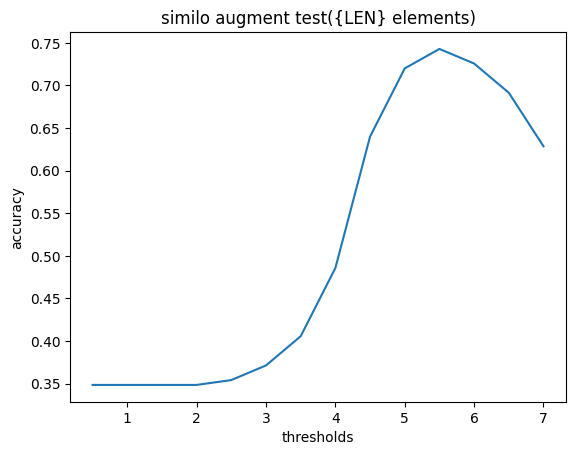

In [4]:
### 測試 augment 1-7之間的閾值
THRESHOLDS = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7] #測試每一個閾值
# ### 測試 augment 5.5-6之間的閾值
# THRESHOLDS = [5.5, 5.6, 5.7, 5.8, 5.9, 6] #測試每一個閾值
LEN = len(df_augment) #全部df的長度
df_augment_thresholds = [pd.DataFrame() for _ in range(len(THRESHOLDS))]
aug_accuracies = []
df_count = 0
# 設定顯示格式選項
pd.set_option('display.float_format', '{:.2f}'.format)  # 顯示小數位數為兩位
for threshold in THRESHOLDS:
    print(f"threshold_{threshold}:")
    df_augment_thresholds[df_count] = df_augment.copy(deep=True)
    for index, row in df_augment_thresholds[df_count].iterrows():
        # 檢查similarity有沒有低於threshold
        if row['SIM Sim'] < threshold:
            df_augment_thresholds[df_count].at[index, "Similo result"] = "-" # 把找到的結果改成"-"
            if row['New xpath (ground truth)'] == "-": # 檢查正解是不是元素消失
                df_augment_thresholds[df_count].at[index, "Similo result"] = "correct"
            else: # 如果把對的改成錯的
                df_augment_thresholds[df_count].at[index, "Similo result"] = "incorrect" 
    incorrect = df_augment_thresholds[df_count]["Similo result"].value_counts()['incorrect']
    correct = df_augment_thresholds[df_count]["Similo result"].value_counts()['correct']
    aug_accuracies.append((correct/LEN))
    print(f"correct: {correct}\tincorrect: {incorrect}\t accuracy: {correct/LEN}")
    df_count+=1
plt.plot(THRESHOLDS,aug_accuracies)
plt.xlabel('thresholds')
plt.ylabel('accuracy')
plt.title('similo augment test({LEN} elements)')
plt.savefig(f'augment_{THRESHOLDS[0]}to{THRESHOLDS[-1]}.png')
    

threshold_0.5:
correct: 596	incorrect: 148	 accuracy: 0.8010752688172043
threshold_1:
correct: 596	incorrect: 148	 accuracy: 0.8010752688172043
threshold_1.5:
correct: 596	incorrect: 148	 accuracy: 0.8010752688172043
threshold_2:
correct: 596	incorrect: 148	 accuracy: 0.8010752688172043
threshold_2.5:
correct: 596	incorrect: 148	 accuracy: 0.8010752688172043
threshold_3:
correct: 595	incorrect: 149	 accuracy: 0.7997311827956989
threshold_3.5:
correct: 590	incorrect: 154	 accuracy: 0.793010752688172
threshold_4:
correct: 581	incorrect: 163	 accuracy: 0.7809139784946236
threshold_4.5:
correct: 575	incorrect: 169	 accuracy: 0.7728494623655914
threshold_5:
correct: 555	incorrect: 189	 accuracy: 0.7459677419354839
threshold_5.5:
correct: 514	incorrect: 230	 accuracy: 0.6908602150537635
threshold_6:
correct: 432	incorrect: 312	 accuracy: 0.5806451612903226
threshold_6.5:
correct: 343	incorrect: 401	 accuracy: 0.46102150537634407
threshold_7:
correct: 249	incorrect: 495	 accuracy: 0.334677419

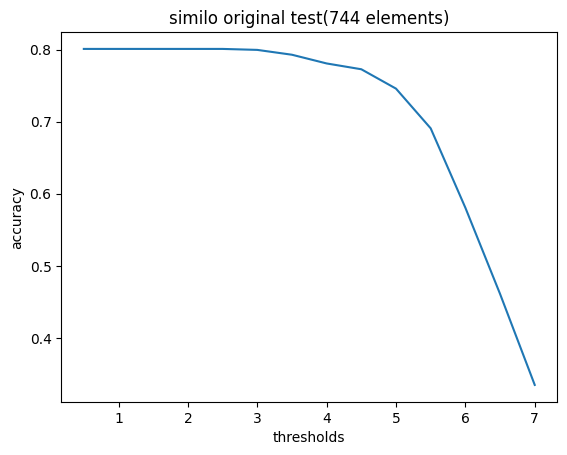

In [5]:
### 測試 original 1-7之間的閾值
THRESHOLDS = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7] #測試每一個閾值
LEN = len(df_original) #全部df的長度
df_original_thresholds = [pd.DataFrame() for _ in range(len(THRESHOLDS))]
ori_accuracies = []
df_count = 0
# 設定顯示格式選項
pd.set_option('display.float_format', '{:.2f}'.format)  # 顯示小數位數為兩位
for threshold in THRESHOLDS:
    print(f"threshold_{threshold}:")
    df_original_thresholds[df_count] = df_original.copy(deep=True)
    for index, row in df_original_thresholds[df_count].iterrows():
        # 檢查similarity有沒有低於threshold
        if float(row['similarity']) < threshold:
            df_original_thresholds[df_count].at[index, "xpath"] = "-" # 把找到的結果改成"-"
            if row['status'] == "correct": # 如果把對的改成錯的
                df_original_thresholds[df_count].at[index, "status"] = "incorrect" 
    incorrect = df_original_thresholds[df_count]["status"].value_counts()['incorrect']
    correct = df_original_thresholds[df_count]["status"].value_counts()['correct']
    ori_accuracies.append(correct/LEN)
    df_count +=1
    print(f"correct: {correct}\tincorrect: {incorrect}\t accuracy: {correct/LEN}")
plt.plot(THRESHOLDS,ori_accuracies)
plt.xlabel('thresholds')
plt.ylabel('accuracy')
plt.title(f'similo original test({LEN} elements)')
plt.savefig(f'original_{THRESHOLDS[0]}to{THRESHOLDS[-1]}.png')

threshold_4.0:
original: 0.78	augment: 0.49	 total: 0.72
threshold_4.1:
original: 0.78	augment: 0.51	 total: 0.73
threshold_4.2:
original: 0.78	augment: 0.51	 total: 0.73
threshold_4.3:
original: 0.77	augment: 0.54	 total: 0.73
threshold_4.4:
original: 0.77	augment: 0.59	 total: 0.74
threshold_4.5:
original: 0.77	augment: 0.64	 total: 0.75
threshold_4.6:
original: 0.77	augment: 0.65	 total: 0.75
threshold_4.7:
original: 0.77	augment: 0.67	 total: 0.75
threshold_4.8:
original: 0.76	augment: 0.69	 total: 0.75
threshold_4.9:
original: 0.75	augment: 0.71	 total: 0.74


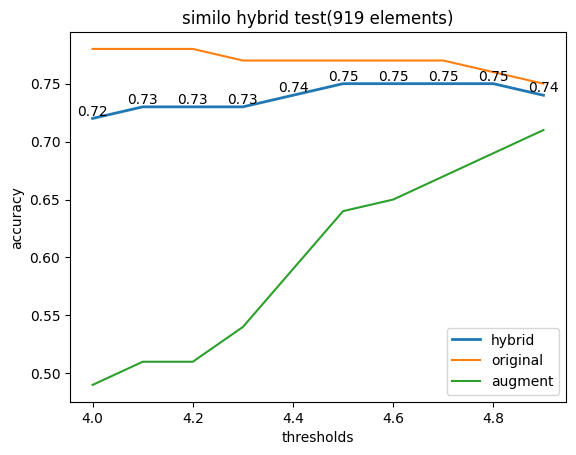

In [22]:
### 測試 augment+original=hybrid的各個閾值
# THRESHOLDS = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7] #測試每一個閾值
THRESHOLDS = [4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9]
LEN = len(df_original)+len(df_augment) #全部df的長度
df_original_thresholds = [pd.DataFrame() for _ in range(len(THRESHOLDS))]
df_augment_thresholds = [pd.DataFrame() for _ in range(len(THRESHOLDS))]
ori_accuracies = []
aug_accuracies = []
hyb_accuracies = []
df_count = 0
# 設定顯示格式選項
pd.set_option('display.float_format', '{:.2f}'.format)  # 顯示小數位數為兩位
for threshold in THRESHOLDS:
    print(f"threshold_{threshold}:")

    df_original_thresholds[df_count] = df_original.copy(deep=True)
    df_augment_thresholds[df_count] = df_augment.copy(deep=True)

    for index, row in df_original_thresholds[df_count].iterrows(): # 計算original的部分
        # 檢查similarity有沒有低於threshold
        if float(row['similarity']) < threshold:
            df_original_thresholds[df_count].at[index, "xpath"] = "-" # 把找到的結果改成"-"
            if row['status'] == "correct": # 如果把對的改成錯的
                df_original_thresholds[df_count].at[index, "status"] = "incorrect" 
    
    for index, row in df_augment_thresholds[df_count].iterrows(): # 計算augment的部分
        # 檢查similarity有沒有低於threshold
        if row['SIM Sim'] < threshold:
            df_augment_thresholds[df_count].at[index, "Similo result"] = "-" # 把找到的結果改成"-"
            if row['New xpath (ground truth)'] == "-": # 檢查正解是不是元素消失
                df_augment_thresholds[df_count].at[index, "Similo result"] = "correct"
            else: # 如果把對的改成錯的
                df_augment_thresholds[df_count].at[index, "Similo result"] = "incorrect" 

    ori_incorrect = df_original_thresholds[df_count]["status"].value_counts()['incorrect']
    ori_correct = df_original_thresholds[df_count]["status"].value_counts()['correct']

    aug_incorrect = df_augment_thresholds[df_count]["Similo result"].value_counts()['incorrect']
    aug_correct = df_augment_thresholds[df_count]["Similo result"].value_counts()['correct']

    ori_accuracy = round(ori_correct/len(df_original_thresholds[df_count]),2)
    aug_accuracy = round(aug_correct/len(df_augment_thresholds[df_count]),2)
    hyb_accuracy = round((ori_correct+aug_correct)/LEN,2)

    ori_accuracies.append(ori_accuracy)
    aug_accuracies.append(aug_accuracy)
    hyb_accuracies.append(hyb_accuracy)

    df_count +=1
    print(f"original: {ori_accuracy}\taugment: {aug_accuracy}\t total: {hyb_accuracy}")

plt.plot(THRESHOLDS,hyb_accuracies, label='hybrid', linewidth=2)
for i in range(len(THRESHOLDS)):
    plt.text(THRESHOLDS[i], hyb_accuracies[i], str(hyb_accuracies[i]), ha='center', va='bottom')

plt.plot(THRESHOLDS,ori_accuracies, label='original')
# for i in range(len(THRESHOLDS)):
#     plt.text(THRESHOLDS[i], ori_accuracies[i], str(ori_accuracies[i]), ha='center', va='bottom')

plt.plot(THRESHOLDS,aug_accuracies, label='augment')
# for i in range(len(THRESHOLDS)):
#     plt.text(THRESHOLDS[i], aug_accuracies[i], str(aug_accuracies[i]), ha='center', va='bottom')
plt.xlabel('thresholds')
plt.ylabel('accuracy')
plt.title(f'similo hybrid test({LEN} elements)')
plt.legend()
plt.savefig(f'hybrid_{THRESHOLDS[0]}to{THRESHOLDS[-1]}.png')